In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

import folium
from folium.plugins import HeatMap



import random

In [5]:
#austin = pd.read_csv("AustinAirbnbData.csv", index_col=0)
#df = pd.DataFrame(austin)
austin = r"C:\Users\abiga\Downloads\AustinAirbnbData.csv"
df = pd.read_csv(austin)

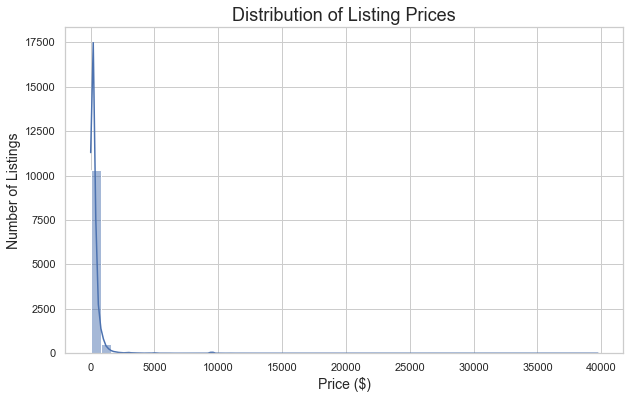

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.histplot(df['price'].dropna(), bins=50, kde=True) # Plots the distribution of price

plt.title('Distribution of Listing Prices', fontsize=18)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)

plt.show()

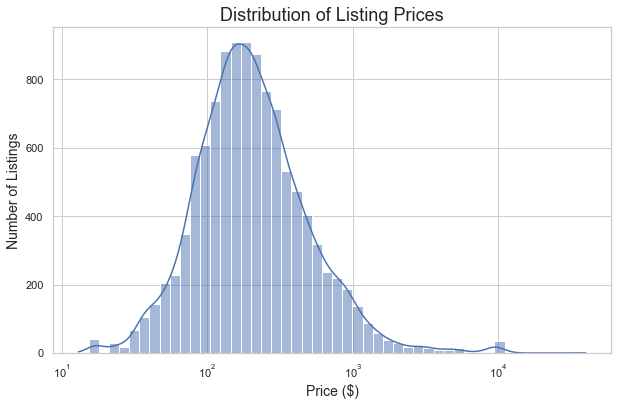

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.histplot(df['price'].dropna(), bins=50, kde=True, log_scale=(True, False)) #Puts the x-axis in log scale so the distribution isn't so clustered

plt.title('Distribution of Listing Prices', fontsize=18)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)

plt.show()

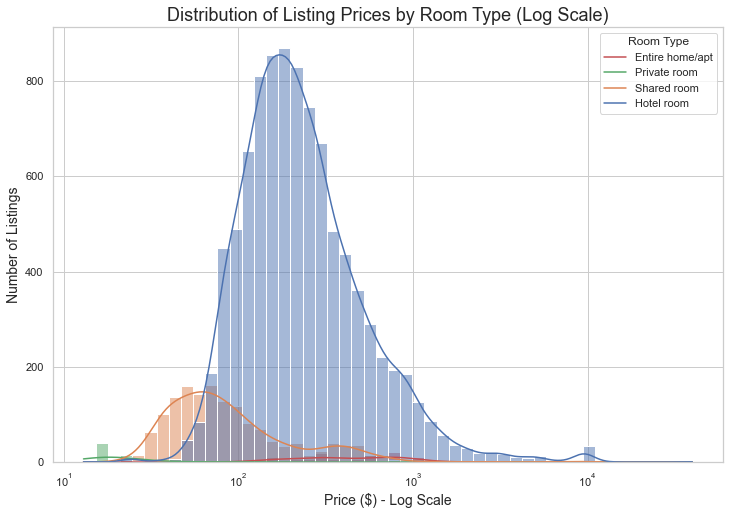

In [8]:
sns.set(style="whitegrid")

df_filtered = df[df['price'] > 0] # Only keeps listings with positive prices

plt.figure(figsize=(12,8))
sns.histplot(
    data=df_filtered,
    x='price',
    hue='room_type', # color by room type
    bins=50,
    kde=True,
    log_scale=(True, False)
)

plt.title('Distribution of Listing Prices by Room Type (Log Scale)', fontsize=18)
plt.xlabel('Price ($) - Log Scale', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)

plt.legend(title='Room Type', labels=df_filtered['room_type'].unique())
plt.show()


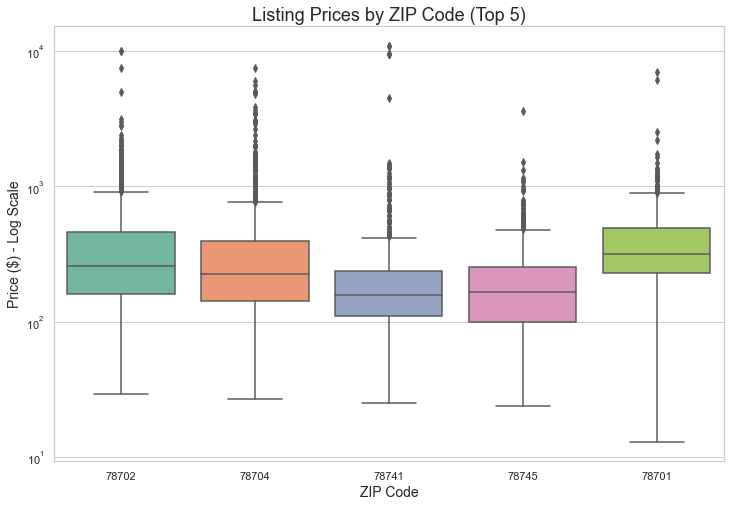

In [9]:
sns.set(style="whitegrid")

top_zipcodes = df_filtered['neighbourhood'].value_counts().head(5).index.tolist()

df_zip = df_filtered[df_filtered['neighbourhood'].isin(top_zipcodes)].copy()
df_zip['neighbourhood'] = df_zip['neighbourhood'].astype(str)

plt.figure(figsize=(12,8))
sns.boxplot(
    data=df_zip,
    x='neighbourhood',
    y='price',        
    palette='Set2'   
)

plt.yscale('log')

plt.title('Listing Prices by ZIP Code (Top 5)', fontsize=18)
plt.xlabel('ZIP Code', fontsize=14)
plt.ylabel('Price ($) - Log Scale', fontsize=14)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


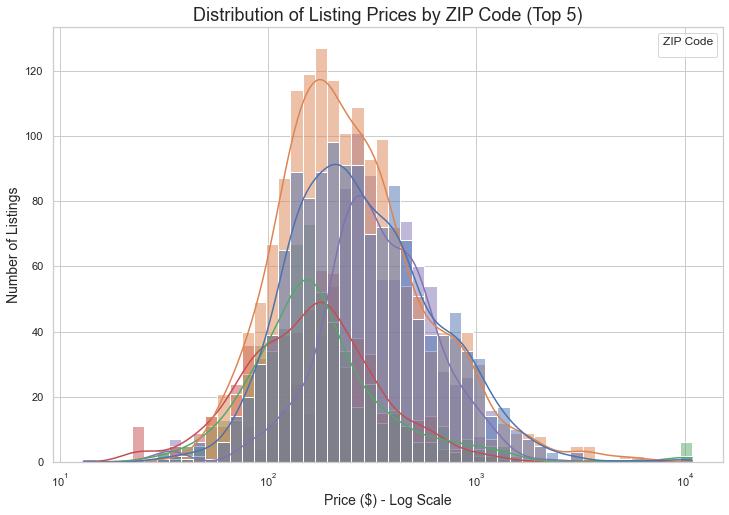

In [10]:
sns.set(style="whitegrid")

df_zip = df_filtered[df_filtered['neighbourhood'].isin(top_zipcodes)].copy()

df_zip['neighbourhood'] = df_zip['neighbourhood'].astype(str)

plt.figure(figsize=(12,8))
sns.histplot(
    data=df_zip,
    x='price',
    hue='neighbourhood',
    bins=50,
    kde=True,
    log_scale=(True, False)
)

plt.title('Distribution of Listing Prices by ZIP Code (Top 5)', fontsize=18)
plt.xlabel('Price ($) - Log Scale', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)

plt.legend(title='ZIP Code')
plt.show()

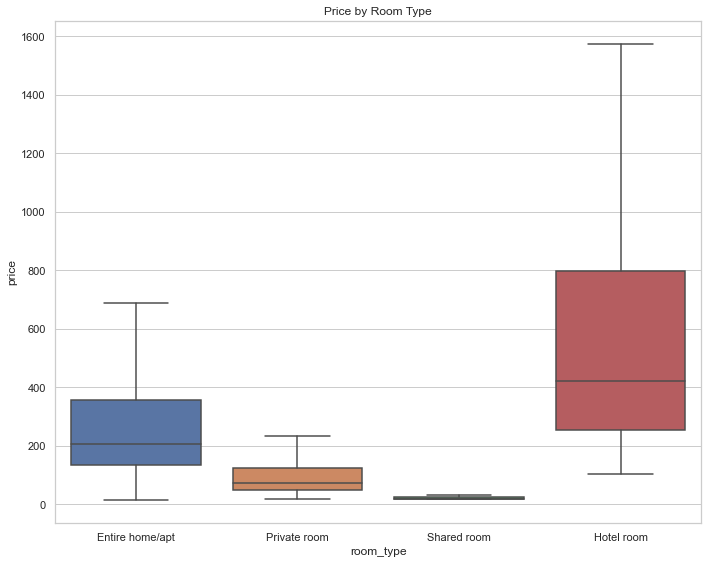

In [11]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='room_type', y='price', showfliers=False)
plt.title("Price by Room Type")
plt.tight_layout()
plt.show()

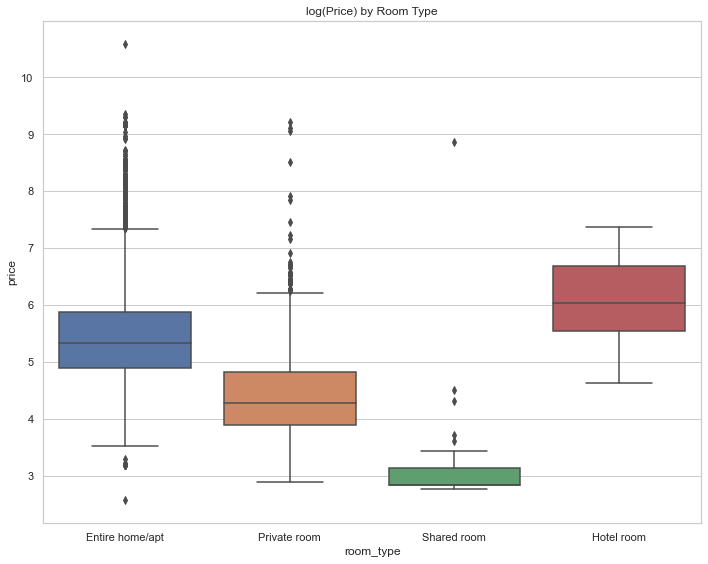

In [12]:
# log price 
plt.figure(figsize=(10, 8))
loggy=np.log(df['price'])
sns.boxplot(data=df, x='room_type', y=np.log(df['price']))
plt.title("log(Price) by Room Type")
plt.tight_layout()
plt.show()


In [13]:
# Drop any rows with missing latitude, longitude, or price
df = df.dropna(subset=['latitude', 'longitude', 'price'])

# Step 4: Make a HeatMap data list
heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in df.iterrows()]

# Step 5: Create a base map centered around Austin
m = folium.Map(location=[30.2672, -97.7431], zoom_start=12)

# Step 6: Add the HeatMap
HeatMap(heat_data,
        radius=15,
        blur=10,
        max_zoom=1).add_to(m)
# Step 7: Add Tourist Attractions
tourist_attractions = [
    {"name": "Texas State Capitol", "lat": 30.2747, "lon": -97.7404},
    {"name": "Lady Bird Lake", "lat": 30.2604, "lon": -97.7490},
    {"name": "Zilker Park", "lat": 30.2669, "lon": -97.7725},
    {"name": "Barton Springs Pool", "lat": 30.2644, "lon": -97.7720},
    {"name": "South Congress Avenue", "lat": 30.2491, "lon": -97.7496},
    {"name": "The University of Texas at Austin", "lat": 30.2850, "lon": -97.7345},
    {"name": "Sixth Street Historic District", "lat": 30.2676, "lon": -97.7393},
    {"name": "Mount Bonnell", "lat": 30.3215, "lon": -97.7737},
    {"name": "Blanton Museum of Art", "lat": 30.2803, "lon": -97.7370}
]

colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'cadetblue', 'pink']

# Add markers for each tourist attraction with a different color
for idx, place in enumerate(tourist_attractions):
    folium.Marker(
        location=[place["lat"], place["lon"]],
        popup=place["name"],
        icon=folium.Icon(color=colors[idx % len(colors)], icon='info-sign')
    ).add_to(m)

# Show the map
m

In [16]:
df = df.drop(columns=['license', 'host_name', 'name', 'host_id', 'id'], errors='ignore')

df['price'] = df['price'].fillna(df['price'].median())
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

df['log_minimum_nights'] = np.log1p(df['minimum_nights'])
df['log_number_of_reviews'] = np.log1p(df['number_of_reviews'])
df['log_price'] = np.log1p(df['price'])

# found coordinates for downtown austin
downtown_lat, downtown_lon = 30.2711, -97.7437

# found the distance between two coordinates
df['distance_to_center'] = np.sqrt(
    (69 * (df['latitude'] - downtown_lat))**2 +
    (54.6 * (df['longitude'] - downtown_lon))**2
)

df.dropna()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,log_minimum_nights,log_number_of_reviews,log_price,distance_to_center


In [19]:
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_x = enc.fit_transform(df[['room_type']])

column_names = enc.categories_[0]
encoded_df = pd.DataFrame(encoded_x, columns=column_names, index=df.index)

df = pd.concat([df, encoded_df], axis = 1)

X = df[['neighbourhood','latitude','longitude', 'Entire home/apt', 'Hotel room', 'Private room', 'Shared room',
        'latitude', 'log_number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'log_minimum_nights', 'distance_to_center']]

y = df['log_price'].astype(float)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
def forward_selection(X, y):
    selected_features = []
    while True:
        remaining_features = [f for f in X.columns if f not in selected_features]
        new_pval = pd.Series(index=remaining_features)
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            new_pval[feature] = model.pvalues[feature]
        min_pval = new_pval.min()
        if min_pval < 0.01:
            selected_features.append(new_pval.idxmin())
        else:
            break
    final_model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()

    return selected_features, final_model

selected, model = forward_selection(X_train, y_train)

print("Selected features:", selected)

reg = LinearRegression()
reg.fit(X_train[selected], y_train)
y_pred = reg.predict(X_test[selected])

y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)

rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print("Root Mean Squared Error: {}".format(rmse))

C:\Users\abiga\AppData\Local\Temp\ipykernel_18572\2722823692.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\abiga\AppData\Local\Temp\ipykernel_18572\2722823692.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\abiga\AppData\Local\Temp\ipykernel_18572\2722823692.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\abiga\AppData\Local\Temp\ipykernel_18572\2722823692.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future ve

Selected features: ['Private room', 'log_minimum_nights', 'neighbourhood', 'Shared room', 'log_number_of_reviews', 'longitude', 'distance_to_center', 'availability_365', 'calculated_host_listings_count', 'latitude', 'Entire home/apt', 'Hotel room']
Root Mean Squared Error: 873.0938484615486


In [22]:
def backward_elimination(X, y, threshold_in=0.01):
    selected_features = list(X.columns)

    while True:
        model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
        pvalues = model.pvalues.iloc[1:]

        max_pval = pvalues.max()

        if max_pval > threshold_in:
            excluded_feature = pvalues.idxmax()
            selected_features.remove(excluded_feature)
        else:
            break
    final_model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
    return selected_features, final_model

selected, model = backward_elimination(X_train, y_train)

print("Selected features:", selected)

reg = LinearRegression()
reg.fit(X_train[selected], y_train)
y_pred = reg.predict(X_test[selected])

y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)

rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print("Root Mean Squared Error: {}".format(rmse))

Selected features: ['neighbourhood', 'latitude', 'longitude', 'Entire home/apt', 'Entire home/apt', 'Hotel room', 'Hotel room', 'Private room', 'Private room', 'Shared room', 'Shared room', 'latitude', 'log_number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'log_minimum_nights', 'distance_to_center']
Root Mean Squared Error: 873.0938484615427


In [23]:

dfmlp = pd.DataFrame(austin)

#drop useless columns
dfmlp = dfmlp.drop(columns=['license', 'host_name', 'name', 'host_id', 'id'], errors='ignore')

#created clusters of close together landmarks 
clusters = {
    "downtown_cluster": [
        (30.2747, -97.7404),  # Texas State Capitol
        (30.2604, -97.7490),  # Lady Bird Lake
        (30.2676, -97.7393),  # Sixth Street Historic District
        (30.2850, -97.7345),  # University of Texas at Austin
        (30.2803, -97.7370)   # Blanton Museum of Art
    ],
    "zilker_cluster": [
        (30.2669, -97.7725),  # Zilker Park
        (30.2644, -97.7720)   # Barton Springs Pool
    ],
    "northwest_cluster": [
        (30.3215, -97.7737)   # Mount Bonnell
    ],
    "south_congress_cluster": [
        (30.2491, -97.7496)   # South Congress Avenue
    ]
}

# transformed last review day to days since last review
dfmlp['last_review'] = pd.to_datetime(dfmlp['last_review'], errors='coerce')
today = pd.to_datetime('today')
dfmlp['days_since_last_review'] = (today - dfmlp['last_review']).dt.days
dfmlp['days_since_last_review'] = dfmlp['days_since_last_review'].fillna(dfmlp['days_since_last_review'].max())


dfmlp = dfmlp.drop(columns=['last_review'])

# filled reviews_per_month na values with 0
dfmlp['reviews_per_month'] = dfmlp['reviews_per_month'].fillna(0)

# removed old downtown location feature engineering because it became redundant 
#downtown_lat, downtown_lon = 30.2711, -97.7437

#df['distance_to_center'] = np.sqrt(
#    (69 * (df['latitude'] - downtown_lat))**2 +
#    (54.6 * (df['longitude'] - downtown_lon))**2
#)


#df['is_downtown'] = (df['distance_to_center'] <= 3).astype(int)

# function to calculate distance between lattitude
def calculate_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((69 * (lat1 - lat2))**2 + (54.6 * (lon1 - lon2))**2)

# Create distance to each cluster
for cluster_name, locations in clusters.items():
    distances = [calculate_distance(df['latitude'], df['longitude'], lat, lon) for lat, lon in locations]
    # Take the minimum distance to any point in the cluster
    dfmlp[f"dist_to_{cluster_name}"] = np.min(distances, axis=0)


# transform skewed factors
dfmlp['log_minimum_nights'] = np.log1p(df['minimum_nights'])
dfmlp['log_number_of_reviews'] = np.log1p(df['number_of_reviews'])

# list factors by type
categorical = ['neighbourhood', 'neighbourhood_group', 'room_type']
numerical = [
    'log_minimum_nights', 'log_number_of_reviews', 'calculated_host_listings_count',
    'availability_365', 'number_of_reviews_ltm', 'reviews_per_month',
    'latitude', 'longitude', 'days_since_last_review',
    'dist_to_downtown_cluster', 'dist_to_zilker_cluster', 'dist_to_northwest_cluster', 'dist_to_south_congress_cluster'
]

# removed outliers
price_cap = 1000  
dfmlp = dfmlp[dfmlp['price'] <= price_cap]

# drop rows with missing price data 
df_cleanmlp = dfmlp[categorical + numerical + ['price']].dropna(subset=['price'])
#df_clean = df[categorical + numerical + ['price']]
#df_clean['price'] = df['price'].fillna(df['price'].median())

# log transform price because it is still skewed 
X = df_cleanmlp[categorical + numerical]
y = np.log1p(df_cleanmlp['price'])  

#hot one encoding my categorical variables
temp_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
temp_encoder.fit(X[categorical])


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical),  # numeric features: impute + scale
        ('cat', OneHotEncoder(categories=temp_encoder.categories_, handle_unknown='ignore', sparse_output=False), categorical)  # categorical: one-hot encode
    ]
)


pipeline_for_tuning = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(max_iter=10000, random_state=42))
])

# grid of parameters for hyperparameter tuning
param_grid = {
    'regressor__hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100)],
    'regressor__alpha': [0.0001, 0.001, 0.01],
    'regressor__learning_rate_init': [0.001, 0.01, 0.1]
}

#grid search to run all combinations of hyperparameters
search = GridSearchCV(
    pipeline_for_tuning,
    param_grid,
    cv=3,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

search.fit(X, y)

print("\nBest parameters from tuning:")
print(search.best_params_)

# regression model
best_mlp = MLPRegressor(
    hidden_layer_sizes=search.best_params_['regressor__hidden_layer_sizes'],
    alpha=search.best_params_['regressor__alpha'],
    learning_rate_init=search.best_params_['regressor__learning_rate_init'],
    max_iter=10000,
    random_state=42
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', best_mlp)
])

# kfolds resampling method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# holders for performance metrics
importances_list = []
mae_list = []
rmse_list = []
r2_list = []

feature_names = None 

# run kfolds 
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    pipeline.fit(X_train, y_train)

   
    y_pred = pipeline.predict(X_test)
    y_pred = np.expm1(y_pred)
    y_test = np.expm1(y_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

    
    X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

    
    result = permutation_importance(
        pipeline.named_steps['regressor'],
        X_test_transformed,
        y_test,
        n_repeats=10,
        random_state=22,
        n_jobs=-1
    )
    importances_list.append(result.importances_mean)

    
    if feature_names is None:
        cat_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical)
        num_features = numerical
        feature_names = list(num_features) + list(cat_features)

    print(f"Fold {fold} completed. MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.3f}")


mean_importances = np.mean(importances_list, axis=0)

assert len(feature_names) == len(mean_importances), f"Mismatch: {len(feature_names)} names vs {len(mean_importances)} importances."


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': mean_importances
}).sort_values(by='Importance', ascending=False)


print("\nAverage Model Performance Across Folds:")
print(f"Average MAE: {np.mean(mae_list):.2f} ± {np.std(mae_list):.2f}")
print(f"Average RMSE: {np.mean(rmse_list):.2f} ± {np.std(rmse_list):.2f}")
print(f"Average R²: {np.mean(r2_list):.3f} ± {np.std(r2_list):.3f}")


metrics_df = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'MAE': mae_list,
    'RMSE': rmse_list,
    'R2': r2_list
})

ValueError: DataFrame constructor not properly called!

In [24]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': mean_importances
}).sort_values(by='Importance', ascending=False)




def classify_feature(feature_name):
    if feature_name.startswith('neighbourhood_'):
        return 'Neighbourhood'
    elif feature_name.startswith('room_type_'):
        return 'Room Type'
    else:
        return feature_name

importance_df['Feature_Type'] = importance_df['Feature'].apply(classify_feature)


grouped_importance = importance_df.groupby('Feature_Type')['Importance'].sum().reset_index()


plt.figure(figsize=(8,6))
sns.barplot(data=grouped_importance, x='Importance', y='Feature_Type', palette='viridis')
plt.title('Total Feature Importance by Group (5-Fold CV)', fontsize=16)
plt.xlabel('Total Permutation Importance', fontsize=14)
plt.ylabel('Feature Group', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print(grouped_importance)

NameError: name 'feature_names' is not defined